In [ ]:
#pip install openpyxl

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Cargar el dataset
df_1 = pd.read_excel(r"C:\Users\hp\Downloads\DataForFigure2.1+with+sub+bars+2024.xls")
df_2 = pd.read_excel(r"C:\Users\hp\Downloads\DataForTable2.1.xls")

In [2]:
#df_1: parece proporcionar una visión general o agregada de los datos, sea un resumen o un conjunto de datos agregado que resume o selecciona datos clave de varias fuentes o años

In [3]:
df_1 

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.7407,7.814808,7.666591,1.844054,1.572367,0.694793,0.859294,0.141674,0.546158,2.082367
1,Denmark,7.5827,7.665297,7.500103,1.907798,1.520361,0.698944,0.822740,0.203579,0.548413,1.880887
2,Iceland,7.5251,7.617527,7.432673,1.880718,1.616525,0.718345,0.818509,0.258344,0.182473,2.050233
3,Sweden,7.3441,7.421563,7.266637,1.878146,1.500826,0.723871,0.838269,0.221455,0.523795,1.657707
4,Israel,7.3411,7.405165,7.277036,1.802934,1.512793,0.739816,0.641463,0.153205,0.192823,2.298026
...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),3.2954,3.462328,3.128472,0.533670,0.664700,0.261508,0.472705,0.188676,0.072167,1.102014
139,Sierra Leone,3.2452,3.366252,3.124148,0.654278,0.565977,0.253321,0.469035,0.181365,0.053299,1.067906
140,Lesotho,3.1862,3.468785,2.903615,0.770807,0.850587,0.000000,0.523188,0.082087,0.084969,0.874525
141,Lebanon,2.7065,2.796744,2.616256,1.376726,0.576713,0.556247,0.173223,0.067641,0.028772,-0.072831


In [4]:
df_2

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2359,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2360,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682
2361,Zimbabwe,2022,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350


In [5]:
# Realizar el merge con tu DataFrame existente
df_combined = pd.merge(df_2, df_1, on='Country name', how='left')

In [6]:
df_combined

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,...,1.7210,1.775271,1.666728,0.628138,0.000000,0.241763,0.000000,0.090736,0.088471,0.671903
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,...,1.7210,1.775271,1.666728,0.628138,0.000000,0.241763,0.000000,0.090736,0.088471,0.671903
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,...,1.7210,1.775271,1.666728,0.628138,0.000000,0.241763,0.000000,0.090736,0.088471,0.671903
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,...,1.7210,1.775271,1.666728,0.628138,0.000000,0.241763,0.000000,0.090736,0.088471,0.671903
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,...,1.7210,1.775271,1.666728,0.628138,0.000000,0.241763,0.000000,0.090736,0.088471,0.671903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,...,3.3411,3.456574,3.225626,0.748337,0.850082,0.232064,0.486924,0.096126,0.130598,0.797012
2359,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,...,3.3411,3.456574,3.225626,0.748337,0.850082,0.232064,0.486924,0.096126,0.130598,0.797012
2360,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,...,3.3411,3.456574,3.225626,0.748337,0.850082,0.232064,0.486924,0.096126,0.130598,0.797012
2361,Zimbabwe,2022,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,...,3.3411,3.456574,3.225626,0.748337,0.850082,0.232064,0.486924,0.096126,0.130598,0.797012


In [7]:
# Eliminar las columnas no deseadas del nuevo DataFrame
columns_to_drop = [
    'Dystopia + residual', 
    'Explained by: Perceptions of corruption', 
    'Explained by: Generosity', 
    'Explained by: Freedom to make life choices', 
    'Explained by: Healthy life expectancy', 
    'Explained by: Social support', 
    'Explained by: Log GDP per capita'
]

df_combined = df_combined.drop(columns=columns_to_drop)


In [8]:
df_combined

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Ladder score,upperwhisker,lowerwhisker
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,1.7210,1.775271,1.666728
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,1.7210,1.775271,1.666728
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,1.7210,1.775271,1.666728
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,1.7210,1.775271,1.666728
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,1.7210,1.775271,1.666728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354,3.3411,3.456574,3.225626
2359,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736,3.3411,3.456574,3.225626
2360,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682,3.3411,3.456574,3.225626
2361,Zimbabwe,2022,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350,3.3411,3.456574,3.225626


In [9]:
new_column_names = {
    'Ladder score': 'Ladder Score',
    'upperwhisker': 'Upper Whisker',
    'lowerwhisker': 'Lower Whisker',
    'Healthy life expectancy at birth': 'Healthy Life Expectancy',
    'Freedom to make life choices': 'Freedom',
    'Generosity': 'Generosity Score',
    'Perceptions of corruption': 'Corruption Perception'
    
}   
df_combined.rename(columns=new_column_names, inplace=True)

df_combined

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy Life Expectancy,Freedom,Generosity Score,Corruption Perception,Positive affect,Negative affect,Ladder Score,Upper Whisker,Lower Whisker
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,1.7210,1.775271,1.666728
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,1.7210,1.775271,1.666728
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,1.7210,1.775271,1.666728
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,1.7210,1.775271,1.666728
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,1.7210,1.775271,1.666728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354,3.3411,3.456574,3.225626
2359,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736,3.3411,3.456574,3.225626
2360,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682,3.3411,3.456574,3.225626
2361,Zimbabwe,2022,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350,3.3411,3.456574,3.225626


In [10]:
#df_2.tail()

In [11]:
#VER LOS PAISES MAS FELICES

#sorted_df = df_2.sort_values(by='Life Ladder', ascending=False)
#sorted_df

In [12]:
#PAISES CON POCOS DATOS

#cuba_df = df_2[df_2['Country name'] == 'Cuba']
#cuba_df

In [13]:
#FILTAR POR PAISES

#sorted_mexico_df = mexico_df.sort_values(by='Life Ladder', ascending=False)
#sorted_mexico_df

In [14]:
#Nombre del país: El nombre del país al que corresponden los datos.
#Año: El año en el que se recopilaron los datos.
#Escalera de la vida: Esta columna mide la felicidad subjetiva utilizando la escala Cantril, que pide a las personas que imaginen una escalera con los mejores y peores posibles niveles de vida (de 0 a 10) y que indiquen en qué peldaño se encuentran.
#Log PIB per cápita: El logaritmo del PIB per cápita, que es una medida de la riqueza económica del país. El uso del logaritmo suaviza las diferencias y hace que los datos sean más manejables para el análisis.
#Apoyo social: Esta columna mide la percepción de apoyo social, generalmente a través de preguntas sobre si hay alguien en quien las personas pueden confiar en tiempos de problemas.
#Esperanza de vida saludable al nacer: La cantidad de años que se espera que una persona viva en buena salud, desde el nacimiento.
#Libertad para tomar decisiones de vida: Mide la percepción de libertad en la toma de decisiones importantes en la vida.
#Generosidad: Mide la percepción de generosidad en la sociedad, a menudo basada en la frecuencia de donaciones a organizaciones benéficas.
#Percepciones de corrupción: La percepción de la corrupción dentro de un país, tanto en el gobierno como en las empresas.
#Afecto positivo: Mide la frecuencia de experiencias positivas recientes, como la risa y el disfrute.
#Efecto negativo: Mide la frecuencia de experiencias negativas recientes, como la tristeza y la preocupación.

In [15]:
#Cuando se menciona que se imputan los valores faltantes en las columnas numéricas utilizando la mediana de cada columna, significa que se utiliza la mediana de los valores existentes en esa columna específica para reemplazar los valores faltantes (NaN).

In [16]:
# Función para encontrar columnas con valores nulos por país
def find_null_columns_by_country(df):
    null_columns = df.isnull().sum(axis=0)
    countries_with_nulls = df.groupby('Country name').apply(lambda x: x.isnull().sum())
    countries_with_nulls = countries_with_nulls[countries_with_nulls.sum(axis=1) > 0]

    # Crear un diccionario para almacenar los resultados
    result = {}
    for country, row in countries_with_nulls.iterrows():
        null_cols = row[row > 0].index.tolist()
        result[country] = null_cols
    return result

# Obtener los países y sus columnas con valores nulos
null_columns_by_country = find_null_columns_by_country(df_2)

# Imprimir los resultados
for country, columns in null_columns_by_country.items():
    print(f"País: {country}, Columnas con valores nulos: {columns}")


País: Afghanistan, Columnas con valores nulos: ['Log GDP per capita', 'Generosity']
País: Algeria, Columnas con valores nulos: ['Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
País: Australia, Columnas con valores nulos: ['Generosity']
País: Bahrain, Columnas con valores nulos: ['Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
País: Bangladesh, Columnas con valores nulos: ['Positive affect']
País: Belarus, Columnas con valores nulos: ['Positive affect']
País: Belgium, Columnas con valores nulos: ['Generosity']
País: Brazil, Columnas con valores nulos: ['Generosity']
País: Cambodia, Columnas con valores nulos: ['Freedom to make life choices', 'Perceptions of corruption', 'Positive affect']
País: Canada, Columnas con valores nulos: ['Social support']
País: China, Columnas con valores nulos: ['Freedom to make life choices', 'G

In [17]:
import pandas as pd

# Función para contar valores nulos por país
def count_nulls_by_country(df):
    # Agrupar por 'Country name' y contar los valores nulos en cada columna
    null_counts = df.groupby('Country name').apply(lambda x: x.isnull().sum().sum()).reset_index()
    null_counts.columns = ['Country name', 'Null Count']
    return null_counts

# Obtener el conteo de valores nulos por país
null_counts_by_country = count_nulls_by_country(df_2)

# Unir el conteo de nulos al DataFrame combinado
df_combined = pd.merge(df_combined, null_counts_by_country, on='Country name', how='left')

# Verificar los resultados
print(df_combined[['Country name', 'Null Count']].drop_duplicates().head())


   Country name  Null Count
0   Afghanistan           4
15      Albania           0
31      Algeria           9
42       Angola           0
46    Argentina           0


In [18]:
df_combined

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy Life Expectancy,Freedom,Generosity Score,Corruption Perception,Positive affect,Negative affect,Ladder Score,Upper Whisker,Lower Whisker,Null Count
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,1.7210,1.775271,1.666728,4
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,1.7210,1.775271,1.666728,4
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,1.7210,1.775271,1.666728,4
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,1.7210,1.775271,1.666728,4
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,1.7210,1.775271,1.666728,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354,3.3411,3.456574,3.225626,0
2359,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736,3.3411,3.456574,3.225626,0
2360,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682,3.3411,3.456574,3.225626,0
2361,Zimbabwe,2022,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350,3.3411,3.456574,3.225626,0


In [19]:
# Convertir 'Log GDP per capita' a su PIB per cápita original
df_combined['GDP per capita'] = np.exp(df_combined['Log GDP per capita'])

#Objetivo de tener el pib per capita monetario para cada país.

print(df_combined[['Country name', 'year', 'Log GDP per capita', 'GDP per capita']].head())

  Country name  year  Log GDP per capita  GDP per capita
0  Afghanistan  2008            7.350416     1556.844326
1  Afghanistan  2009            7.508646     1823.742544
2  Afghanistan  2010            7.613900     2026.164159
3  Afghanistan  2011            7.581259     1961.095989
4  Afghanistan  2012            7.660506     2122.830825


In [20]:
df_combined

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy Life Expectancy,Freedom,Generosity Score,Corruption Perception,Positive affect,Negative affect,Ladder Score,Upper Whisker,Lower Whisker,Null Count,GDP per capita
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,1.7210,1.775271,1.666728,4,1556.844326
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,1.7210,1.775271,1.666728,4,1823.742544
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,1.7210,1.775271,1.666728,4,2026.164159
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,1.7210,1.775271,1.666728,4,1961.095989
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,1.7210,1.775271,1.666728,4,2122.830825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354,3.3411,3.456574,3.225626,0,2203.396554
2359,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736,3.3411,3.456574,3.225626,0,1990.319112
2360,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682,3.3411,3.456574,3.225626,0,2115.144628
2361,Zimbabwe,2022,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350,3.3411,3.456574,3.225626,0,2143.237965


In [21]:
# Lista de países y su respectivo continente
continent_countries = {
    "Asia": ['Yemen', 'Vietnam', 'Uzbekistan', 'United Arab Emirates', 'Türkiye', 'Turkmenistan', 'Afghanistan', 
             'Bahrain', 'Bangladesh', 'Cambodia', 'China', 'Hong Kong S.A.R. of China', 'India', 'Iran', 'Iraq', 
             'Israel', 'Japan', 'Jordan', 'Kuwait', 'Laos', 'Lebanon', 'Maldives', 'Nepal', 'Oman', 'Pakistan', 
             'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'State of Palestine', 
             'Taiwan Province of China', 'Tajikistan', 'Armenia', 'Azerbaijan', 'Bhutan', 'Georgia', 'Indonesia', 
             'Kazakhstan', 'Kyrgyzstan', 'Malaysia', 'Mongolia', 'Myanmar', 'Sri Lanka', 'Syria', 'Thailand'],
    "Africa": ['Algeria', 'Congo (Brazzaville)', 'Djibouti', 'Egypt', 'Ethiopia', 'Libya', 'Madagascar', 
               'Morocco', 'Niger', 'Rwanda', 'Somaliland region', 'South Africa', 'South Sudan', 'Tunisia', 'Zimbabwe',
               'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 
               'Chad', 'Comoros', 'Congo (Kinshasa)', 'Eswatini', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Ivory Coast', 
               'Kenya', 'Lesotho', 'Liberia', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mozambique', 'Namibia', 
               'Nigeria', 'Senegal', 'Sierra Leone', 'Somalia', 'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zambia'],
    "North America": ['United States', 'Canada', 'Belize', 'Costa Rica', 'Dominican Republic', 'El Salvador', 'Guatemala', 
                      'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Trinidad and Tobago'],
    "South America": ['Venezuela', 'Brazil', 'Cuba', 'Mexico', 'Argentina', 'Bolivia', 'Chile', 'Colombia', 'Ecuador', 
                      'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay'],
    "Europe": ['United Kingdom', 'Belarus', 'Belgium', 'Cyprus', 'Czechia', 'Denmark', 'France', 'Germany', 
               'Greece', 'Hungary', 'Iceland', 'Italy', 'Kosovo', 'Malta', 'Netherlands', 'Poland', 'Romania', 
               'Spain', 'Sweden', 'Albania', 'Austria', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Estonia', 
               'Finland', 'Ireland', 'Latvia', 'Lithuania', 'Luxembourg', 'Moldova', 'Montenegro', 'North Macedonia', 
               'Norway', 'Portugal', 'Russia', 'Serbia', 'Slovakia', 'Slovenia', 'Switzerland', 'Ukraine',"Türkiye"],
    "Australia/Oceania": ['Australia', 'New Zealand']
}

# Función para asignar continente
def get_continent(country):
    for continent, countries in continent_countries.items():
        if country in countries:
            return continent
    return 'Unknown'

# Crear la columna 'Continent' en el DataFrame
df_combined['Continent'] = df_combined['Country name'].apply(get_continent)

# Eliminar la columna 'Log GDP per capita'
df_combined.drop(columns=['Log GDP per capita'], inplace=True)

# Crear la columna 'High Corruption' basada en 'Perceptions of corruption'
df_combined['High Corruption'] = df_2['Perceptions of corruption'] > 0.7

# Mostrar países con continentes desconocidos
unknown_continent_countries = df_combined[df_combined['Continent'] == 'Unknown']['Country name'].unique()
print("Países con continente desconocido:")
print(unknown_continent_countries)



Países con continente desconocido:
[]


In [22]:
df_combined

,Country name,year,Life Ladder,Social support,Healthy Life Expectancy,Freedom,Generosity Score,Corruption Perception,Positive affect,Negative affect,Ladder Score,Upper Whisker,Lower Whisker,Null Count,GDP per capita,Continent,High Corruption
0,Afghanistan,2008,3.723590,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,1.7210,1.775271,1.666728,4,1556.844326,Asia,True
1,Afghanistan,2009,4.401778,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,1.7210,1.775271,1.666728,4,1823.742544,Asia,True
2,Afghanistan,2010,4.758381,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,1.7210,1.775271,1.666728,4,2026.164159,Asia,True
3,Afghanistan,2011,3.831719,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,1.7210,1.775271,1.666728,4,1961.095989,Asia,True
4,Afghanistan,2012,3.782938,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,1.7210,1.775271,1.666728,4,2122.830825,Asia,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354,3.3411,3.456574,3.225626,0,2203.396554,Africa,True
2359,Zimbabwe,2020,3.159802,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736,3.3411,3.456574,3.225626,0,1990.319112,Africa,True
2360,Zimbabwe,2021,3.154578,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682,3.3411,3.456574,3.225626,0,2115.144628,Africa,True
2361,Zimbabwe,2022,3.296220,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350,3.3411,3.456574,3.225626,0,2143.237965,Africa,True


In [23]:
# Identificar las columnas numéricas
numeric_columns = df_combined.select_dtypes(include=['float64', 'int64']).columns

# Filtrar DataFrame solo con columnas numéricas
df_numeric = df_combined[numeric_columns]

In [24]:
new_column_names = {
    'GDP per capita': 'Rent per capita',
    "Null Count": "Transparecy",
   
    
}   
df_combined.rename(columns=new_column_names, inplace=True)

df_combined

,Country name,year,Life Ladder,Social support,Healthy Life Expectancy,Freedom,Generosity Score,Corruption Perception,Positive affect,Negative affect,Ladder Score,Upper Whisker,Lower Whisker,Transparecy,Rent per capita,Continent,High Corruption
0,Afghanistan,2008,3.723590,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,1.7210,1.775271,1.666728,4,1556.844326,Asia,True
1,Afghanistan,2009,4.401778,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,1.7210,1.775271,1.666728,4,1823.742544,Asia,True
2,Afghanistan,2010,4.758381,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,1.7210,1.775271,1.666728,4,2026.164159,Asia,True
3,Afghanistan,2011,3.831719,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,1.7210,1.775271,1.666728,4,1961.095989,Asia,True
4,Afghanistan,2012,3.782938,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,1.7210,1.775271,1.666728,4,2122.830825,Asia,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354,3.3411,3.456574,3.225626,0,2203.396554,Africa,True
2359,Zimbabwe,2020,3.159802,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736,3.3411,3.456574,3.225626,0,1990.319112,Africa,True
2360,Zimbabwe,2021,3.154578,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682,3.3411,3.456574,3.225626,0,2115.144628,Africa,True
2361,Zimbabwe,2022,3.296220,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350,3.3411,3.456574,3.225626,0,2143.237965,Africa,True


In [25]:
# Lista de columnas numéricas
numeric_cols = ['Life Ladder', 'Rent per capita', 'Social support', 
                'Healthy Life Expectancy', 'Freedom', 
                'Generosity Score', 'Corruption Perception', 'Positive affect', 
                'Negative affect', 'Ladder Score', 'Upper Whisker', 'Lower Whisker']

# Crear la columna 'High Corruption' basada en 'Perceptions of corruption'
df_combined['High Corruption'] = (df_combined['Corruption Perception'] > 0.7).astype(int)
df_combined['Low Corruption'] = (df_combined['Corruption Perception'] <= 0.7).astype(int)

# Convertir columnas numéricas que puedan estar representadas como strings a floats
for col in numeric_cols:
    if df_combined[col].dtype == 'object':
        df_combined[col] = df_combined[col].apply(lambda x: float(str(x).replace(',', '.')))

print(df_combined.head())



  Country name  year  Life Ladder  Social support  Healthy Life Expectancy  \
0  Afghanistan  2008     3.723590        0.450662                50.500000   
1  Afghanistan  2009     4.401778        0.552308                50.799999   
2  Afghanistan  2010     4.758381        0.539075                51.099998   
3  Afghanistan  2011     3.831719        0.521104                51.400002   
4  Afghanistan  2012     3.782938        0.520637                51.700001   

    Freedom  Generosity Score  Corruption Perception  Positive affect  \
0  0.718114          0.164055               0.881686         0.414297   
1  0.678896          0.187297               0.850035         0.481421   
2  0.600127          0.117861               0.706766         0.516907   
3  0.495901          0.160098               0.731109         0.479835   
4  0.530935          0.234157               0.775620         0.613513   

   Negative affect  Ladder Score  Upper Whisker  Lower Whisker  Transparecy  \
0         0.2

In [26]:
df_combined

,Country name,year,Life Ladder,Social support,Healthy Life Expectancy,Freedom,Generosity Score,Corruption Perception,Positive affect,Negative affect,Ladder Score,Upper Whisker,Lower Whisker,Transparecy,Rent per capita,Continent,High Corruption,Low Corruption
0,Afghanistan,2008,3.723590,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,1.7210,1.775271,1.666728,4,1556.844326,Asia,1,0
1,Afghanistan,2009,4.401778,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,1.7210,1.775271,1.666728,4,1823.742544,Asia,1,0
2,Afghanistan,2010,4.758381,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,1.7210,1.775271,1.666728,4,2026.164159,Asia,1,0
3,Afghanistan,2011,3.831719,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,1.7210,1.775271,1.666728,4,1961.095989,Asia,1,0
4,Afghanistan,2012,3.782938,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,1.7210,1.775271,1.666728,4,2122.830825,Asia,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354,3.3411,3.456574,3.225626,0,2203.396554,Africa,1,0
2359,Zimbabwe,2020,3.159802,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736,3.3411,3.456574,3.225626,0,1990.319112,Africa,1,0
2360,Zimbabwe,2021,3.154578,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682,3.3411,3.456574,3.225626,0,2115.144628,Africa,1,0
2361,Zimbabwe,2022,3.296220,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350,3.3411,3.456574,3.225626,0,2143.237965,Africa,1,0


In [27]:
#COMPROBAR SI HAY DUPLICADOS (NO LOS HAY)

import pandas as pd

# Verificar si hay filas duplicadas en todo el DataFrame
duplicados = df_combined[df_combined.duplicated()]

# Verificar si hay filas duplicadas basadas en una o más columnas específicas (por ejemplo, 'Country name' y 'year')
duplicados_especificos = df_combined[df_combined.duplicated(subset=[
    'Country name', 'year', 'Life Ladder', 'Social support', 
    'Healthy Life Expectancy', 'Freedom', 
    'Generosity Score', 'Corruption Perception', 'Positive affect', 
    'Negative affect', 'Ladder Score', 'Upper Whisker', 
    'Lower Whisker', 'Continent', 'Rent per capita'
])]

# Imprimir los duplicados encontrados
print("Filas duplicadas en todo el DataFrame:")
print(duplicados)

print("\nFilas duplicadas basadas en 'Country name' y 'year':")
print(duplicados_especificos)


Filas duplicadas en todo el DataFrame:
Empty DataFrame
Columns: [Country name, year, Life Ladder, Social support, Healthy Life Expectancy, Freedom, Generosity Score, Corruption Perception, Positive affect, Negative affect, Ladder Score, Upper Whisker, Lower Whisker, Transparecy, Rent per capita, Continent, High Corruption, Low Corruption]
Index: []

Filas duplicadas basadas en 'Country name' y 'year':
Empty DataFrame
Columns: [Country name, year, Life Ladder, Social support, Healthy Life Expectancy, Freedom, Generosity Score, Corruption Perception, Positive affect, Negative affect, Ladder Score, Upper Whisker, Lower Whisker, Transparecy, Rent per capita, Continent, High Corruption, Low Corruption]
Index: []


In [28]:
#Verificar rangos de valores (TODO EN ORDEN)

# Descripción estadística de las columnas numéricas
descripcion = df_combined.describe()


# Verificar si hay valores fuera de los rangos esperados
# Por ejemplo, verificar si 'Life Ladder' está entre 0 y 10
incoherencias_life_ladder = df_combined[(df_combined['Life Ladder'] < 0) | (df_combined['Life Ladder'] > 10)]

# Verificar si 'Log GDP per capita' tiene valores negativos
incoherencias_gdp = df_combined[df_combined['Rent per capita'] < 0]

print("\nIncoherencias en 'Life Ladder':")
print(incoherencias_life_ladder)

print("\nIncoherencias en 'Log GDP per capita':")
print(incoherencias_gdp)



Incoherencias en 'Life Ladder':
Empty DataFrame
Columns: [Country name, year, Life Ladder, Social support, Healthy Life Expectancy, Freedom, Generosity Score, Corruption Perception, Positive affect, Negative affect, Ladder Score, Upper Whisker, Lower Whisker, Transparecy, Rent per capita, Continent, High Corruption, Low Corruption]
Index: []

Incoherencias en 'Log GDP per capita':
Empty DataFrame
Columns: [Country name, year, Life Ladder, Social support, Healthy Life Expectancy, Freedom, Generosity Score, Corruption Perception, Positive affect, Negative affect, Ladder Score, Upper Whisker, Lower Whisker, Transparecy, Rent per capita, Continent, High Corruption, Low Corruption]
Index: []


In [29]:
#Ver paises nulos en continente (TODO BIEN)

# Filtrar las filas que tienen valores nulos en 'Continent'
filas_nulas_continent = df_combined[df_combined['Continent'].isnull()]

# Obtener los nombres de los países con valores nulos en 'Continent'
paises_nulos_continent = filas_nulas_continent['Country name'].unique()

print("Países con valores nulos en 'Continent':")
print(paises_nulos_continent)



Países con valores nulos en 'Continent':
[]


In [30]:
# Lista completa de países del mundo según ISO 3166
world_countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 
    'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 
    'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 
    'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 
    'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Congo-Brazzaville)', 'Congo (Congo-Kinshasa)', 'Costa Rica', 
    'Croatia', 'Cuba', 'Cyprus', 'Czechia (Czech Republic)', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 
    'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini (fmr. "Swaziland")', 
    'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 
    'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 
    'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 
    'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 
    'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 
    'Mauritius', 'Mexico', 'Micronesia', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 
    'Myanmar (formerly Burma)', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 
    'Nigeria', 'North Korea', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestine State', 'Panama', 
    'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda', 
    'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 
    'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 
    'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Korea', 'South Sudan', 'Spain', 
    'Sri Lanka', 'State of Palestine', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Tajikistan', 
    'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 
    'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States of America', 'Uruguay', 
    'Uzbekistan', 'Vanuatu', 'Vatican City', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'
]



In [31]:
# Lista de países y su respectivo continente
continent_countries = {
    "Asia": ['Yemen', 'Vietnam', 'Uzbekistan', 'United Arab Emirates', 'Türkiye', 'Turkmenistan', 'Afghanistan', 
             'Bahrain', 'Bangladesh', 'Cambodia', 'China', 'Hong Kong S.A.R. of China', 'India', 'Iran', 'Iraq', 
             'Israel', 'Japan', 'Jordan', 'Kuwait', 'Laos', 'Lebanon', 'Maldives', 'Nepal', 'Oman', 'Pakistan', 
             'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'State of Palestine', 
             'Taiwan Province of China', 'Tajikistan', 'Armenia', 'Azerbaijan', 'Bhutan', 'Georgia', 'Indonesia', 
             'Kazakhstan', 'Kyrgyzstan', 'Malaysia', 'Mongolia', 'Myanmar', 'Sri Lanka', 'Syria', 'Thailand'],
    "Africa": ['Algeria', 'Congo (Brazzaville)', 'Djibouti', 'Egypt', 'Ethiopia', 'Libya', 'Madagascar', 
               'Morocco', 'Niger', 'Rwanda', 'Somaliland region', 'South Africa', 'South Sudan', 'Tunisia', 'Zimbabwe',
               'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 
               'Chad', 'Comoros', 'Congo (Kinshasa)', 'Eswatini', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Ivory Coast', 
               'Kenya', 'Lesotho', 'Liberia', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mozambique', 'Namibia', 
               'Nigeria', 'Senegal', 'Sierra Leone', 'Somalia', 'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zambia'],
    "North America": ['United States', 'Canada', 'Belize', 'Costa Rica', 'Dominican Republic', 'El Salvador', 'Guatemala', 
                      'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Trinidad and Tobago'],
    "South America": ['Venezuela', 'Brazil', 'Cuba', 'Mexico', 'Argentina', 'Bolivia', 'Chile', 'Colombia', 'Ecuador', 
                      'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay'],
    "Europe": ['United Kingdom', 'Belarus', 'Belgium', 'Cyprus', 'Czechia', 'Denmark', 'France', 'Germany', 
               'Greece', 'Hungary', 'Iceland', 'Italy', 'Kosovo', 'Malta', 'Netherlands', 'Poland', 'Romania', 
               'Spain', 'Sweden', 'Albania', 'Austria', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Estonia', 
               'Finland', 'Ireland', 'Latvia', 'Lithuania', 'Luxembourg', 'Moldova', 'Montenegro', 'North Macedonia', 
               'Norway', 'Portugal', 'Russia', 'Serbia', 'Slovakia', 'Slovenia', 'Switzerland', 'Ukraine',"Türkiye"],
    "Australia/Oceania": ['Australia', 'New Zealand']

SyntaxError: incomplete input (1047686037.py, line 24)

In [ ]:
#PAISES QUE NO SALEN EN MI LISTA

#OCEANIA
#Solomon Islands
#Micronesia
#Fiji
#Samoa
#Palau
#Vanuatu
#Marshall Islands'


#Africa
#Guinea-Bissau
#Equatorial Guinea
#Sao Tome and Pr
#Cabo Verde


#Asia

#Eritrea
#North Korea


#Europa 

#Andorra
#Vatican City

#Norte america (islas del caribe)

#Antigua and Barbuda
#Barbados

In [ ]:
#VER NULOS POR EJEMPLO DE TUKEMENISTAN

#print(df_2[df_2["Country name"]=="Turkmenistan"].isnull().sum())

In [ ]:
# Lista de países para los cuales deseas calcular la mediana
#countries = [
    #'Yemen', 'Vietnam', 'Venezuela', 'Uzbekistan', 'United States', 'United Kingdom', 
    #'United Arab Emirates', 'Türkiye', 'Turkmenistan', 'Afghanistan', 'Algeria', 
    #'Australia', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Cambodia', 
    #'Canada', 'China', 'Congo (Brazzaville)', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
    #'Djibouti', 'Egypt', 'Ethiopia', 'France', 'Germany', 'Greece', 'Hong Kong S.A.R. of China', 
    #'Hungary', 'Iceland', 'India', 'Iran', 'Iraq', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kosovo', 
    #'Kuwait', 'Laos', 'Lebanon', 'Libya', 'Madagascar', 'Maldives', 'Malta', 'Mexico', 'Morocco', 
    #'Nepal', 'Netherlands', 'Niger', 'Oman', 'Pakistan', 'Philippines', 'Poland', 'Qatar', 'Romania', 
    #'Rwanda', 'Saudi Arabia', 'Singapore', 'Somaliland region', 'South Africa', 'South Korea', 
    #'South Sudan', 'Spain', 'State of Palestine', 'Sweden', 'Taiwan Province of China', 'Tajikistan', 
    #'Tunisia'
#]

# Seleccionar las columnas sobre las cuales calcular la mediana
#columns_to_median = ['GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Generosity']

# Iterar sobre cada país
#for country in countries:
    # Filtrar las filas para el país específico y con valores nulos en las columnas seleccionadas
    #null_rows = (df_2['Country name'] == country) & df_2[columns_to_median].isnull().any(axis=1)
    
    # Calcular la mediana solo para las filas con valores nulos en ese país y para las columnas seleccionadas
    #median_values = df_2.loc[null_rows, columns_to_median].median()
    
    # Imprimir o usar los valores calculados como necesites
    #print(f"Mediana para {country} en años con valores nulos:")
    #print(median_values)
    
    #print()  # línea en blanco para separar los resultados de diferentes países


In [32]:
# Verificar valores faltantes en df_2
#print(df_2.isnull().sum())

# Imputar valores faltantes (si es necesario)
#df_2['Generosity'] = df_2['Generosity'].apply(lambda x: float(str(x).replace(',', '.'))) # convierte los valores de la columna 'Generosity' en tipo float después de reemplazar las comas (,) por puntos (.).
#df_2['Generosity'].fillna(df_2['Generosity'].median(), inplace=True) #reemplaza todos los valores NaN en la columna 'Generosity' con el valor de la mediana calculada.


In [33]:
#USAR LA MEDIANA PARA TODOS LOS NULOS.


# Eliminar filas con valores nulos en cualquier columna
#df_2.dropna(inplace=True)

# Imputar valores faltantes en columnas numéricas usando la mediana
#numeric_cols = ['Life Ladder', 'Log GDP per capita', 'Social support', 
                #'Healthy life expectancy at birth', 'Freedom to make life choices', 
                #'Generosity', 'Perceptions of corruption', 'Positive affect', 
                #'Negative affect']

#for col in numeric_cols:
    #if df_2[col].dtype == 'object':
        #df_2[col] = df_2[col].apply(lambda x: float(str(x).replace(',', '.')))
    #median_value = df_2[col].median()
    #df_2[col].fillna(median_value, inplace=True)

# Verificar que no haya más valores faltantes
#print(df_2.isnull().sum())


C:\Users\hp\AppData\Local\Temp\ipykernel_3776\485252130.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  europe_data['Continent'] = 'Europe'
C:\Users\hp\AppData\Local\Temp\ipykernel_3776\485252130.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asia_data['Continent'] = 'Asia'


Estadísticas descriptivas de la felicidad en Europa:
count    316.000000
mean       6.495943
std        0.747289
min        4.683358
25%        6.004797
50%        6.520020
75%        7.034492
max        8.018934
Name: Life Ladder, dtype: float64

Estadísticas descriptivas de la felicidad en Asia:
count    495.000000
mean       5.343373
std        1.006619
min        1.281271
25%        4.688732
50%        5.286824
75%        6.109019
max        7.662397
Name: Life Ladder, dtype: float64


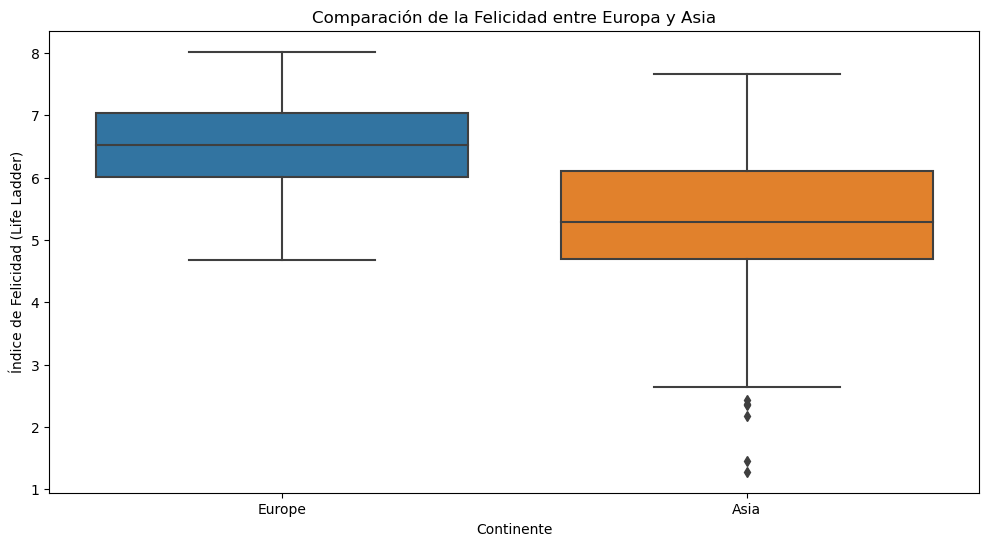

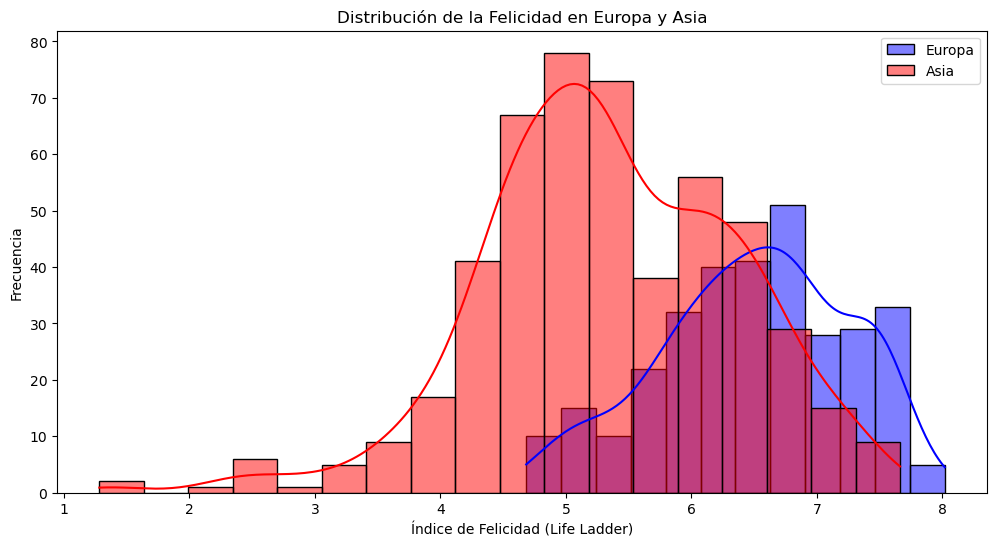

In [34]:
#COMPARACION DE PAISES


# Listas de países por continente
asia_countries = [
    'Yemen', 'Vietnam', 'Uzbekistan', 'United Arab Emirates', 'Türkiye', 'Turkmenistan',
    'Afghanistan', 'Bahrain', 'Bangladesh', 'Cambodia', 'China', 'Hong Kong S.A.R. of China',
    'India', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kuwait', 'Laos', 'Lebanon',
    'Maldives', 'Nepal', 'Oman', 'Pakistan', 'Philippines', 'Qatar', 'Saudi Arabia',
    'Singapore', 'South Korea', 'State of Palestine', 'Taiwan Province of China', 'Tajikistan'
]

europe_countries = [
    'United Kingdom', 'Belarus', 'Belgium', 'Cyprus', 'Czechia', 'Denmark', 'France',
    'Germany', 'Greece', 'Hungary', 'Iceland', 'Italy', 'Kosovo', 'Malta', 'Netherlands',
    'Poland', 'Romania', 'Spain', 'Sweden'
]

# Filtrar los datos de Europa y Asia
europe_data = df_combined[df_combined['Country name'].isin(europe_countries)]
asia_data = df_combined[df_combined['Country name'].isin(asia_countries)]

# Agregar columna de continente
europe_data['Continent'] = 'Europe'
asia_data['Continent'] = 'Asia'

# Combinar los datos
combined_data = pd.concat([europe_data, asia_data])

# Estadísticas descriptivas
europe_happiness = europe_data['Life Ladder']
asia_happiness = asia_data['Life Ladder']

print("Estadísticas descriptivas de la felicidad en Europa:")
print(europe_happiness.describe())

print("\nEstadísticas descriptivas de la felicidad en Asia:")
print(asia_happiness.describe())

# Visualización de la comparación

# Gráfico boxplot de felicidad por continente
plt.figure(figsize=(12, 6))
sns.boxplot(x='Continent', y='Life Ladder', data=combined_data)
plt.title('Comparación de la Felicidad entre Europa y Asia')
plt.xlabel('Continente')
plt.ylabel('Índice de Felicidad (Life Ladder)')
plt.show()

# Gráfico histograma de felicidad por continente
plt.figure(figsize=(12, 6))
sns.histplot(europe_happiness, kde=True, color='blue', label='Europa')
sns.histplot(asia_happiness, kde=True, color='red', label='Asia')
plt.title('Distribución de la Felicidad en Europa y Asia')
plt.xlabel('Índice de Felicidad (Life Ladder)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()



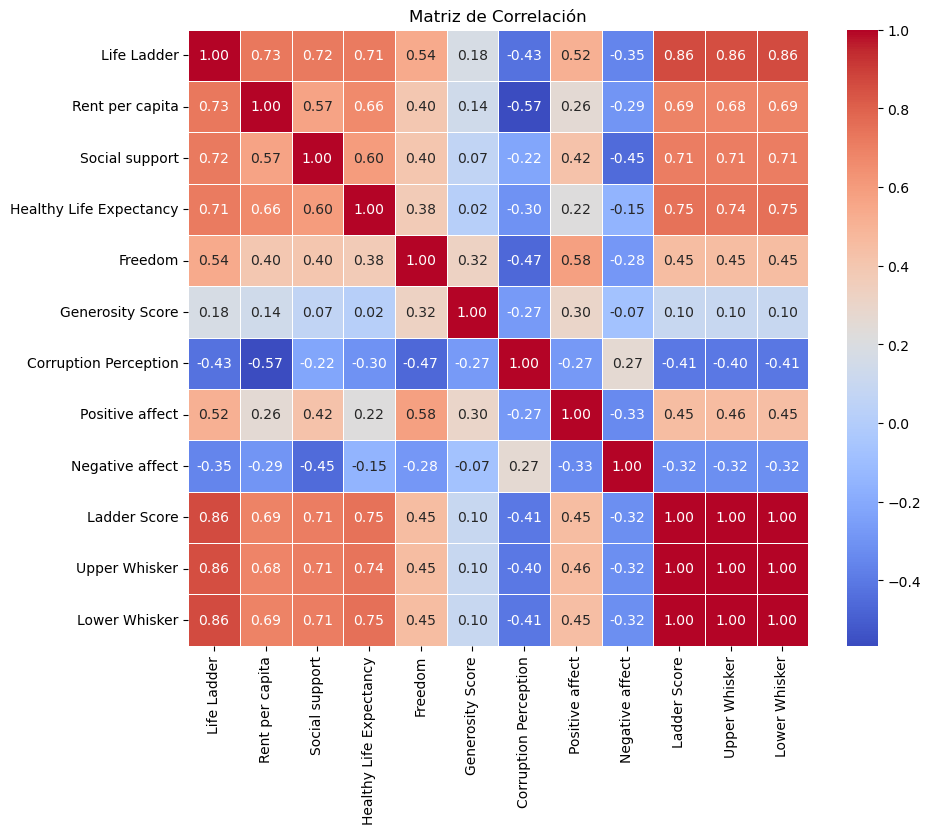

In [35]:
#MATRIZ DE CORRELACION DE TODOS


# Filtrar solo las columnas numéricas
df_numeric = df_combined[numeric_cols]

# Matriz de correlación
correlation_matrix = df_numeric.corr()

# Visualización usando un mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()


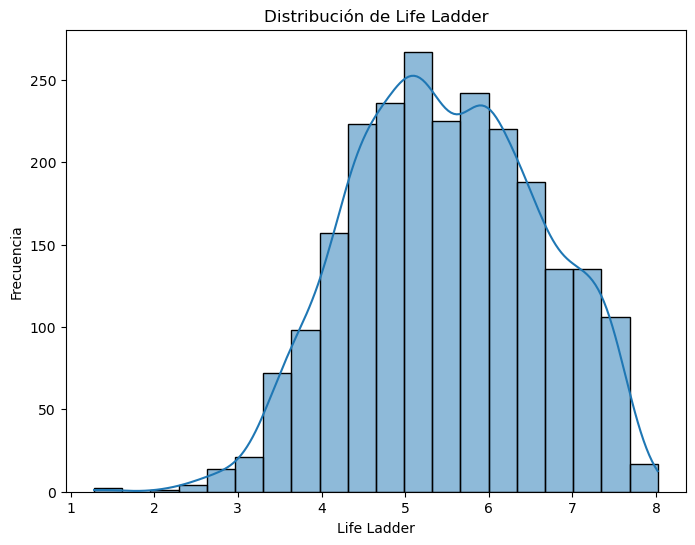

In [36]:
# Ejemplo: Distribución de Life Ladder
plt.figure(figsize=(8, 6))
sns.histplot(df_combined['Life Ladder'], bins=20, kde=True)
plt.title('Distribución de Life Ladder')
plt.xlabel('Life Ladder')
plt.ylabel('Frecuencia')
plt.show()

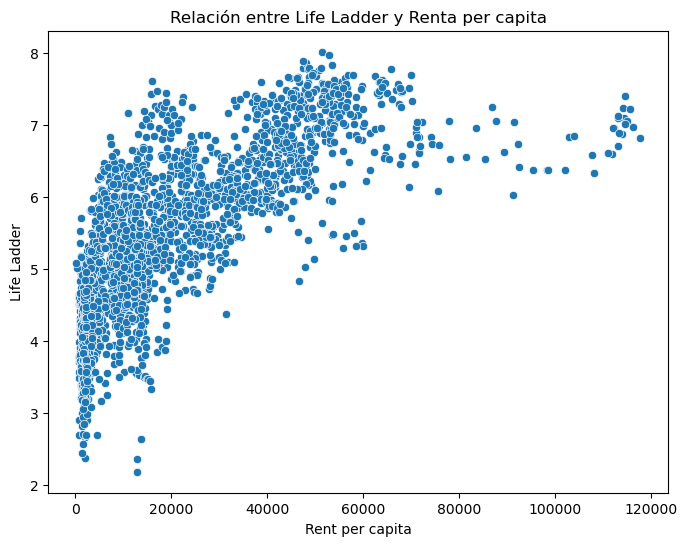

In [37]:
# Ejemplo: Relación entre Life Ladder y Log GDP per capita
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rent per capita', y='Life Ladder', data=df_combined)
plt.title('Relación entre Life Ladder y Renta per capita')
plt.xlabel('Rent per capita')
plt.ylabel('Life Ladder')
plt.show()

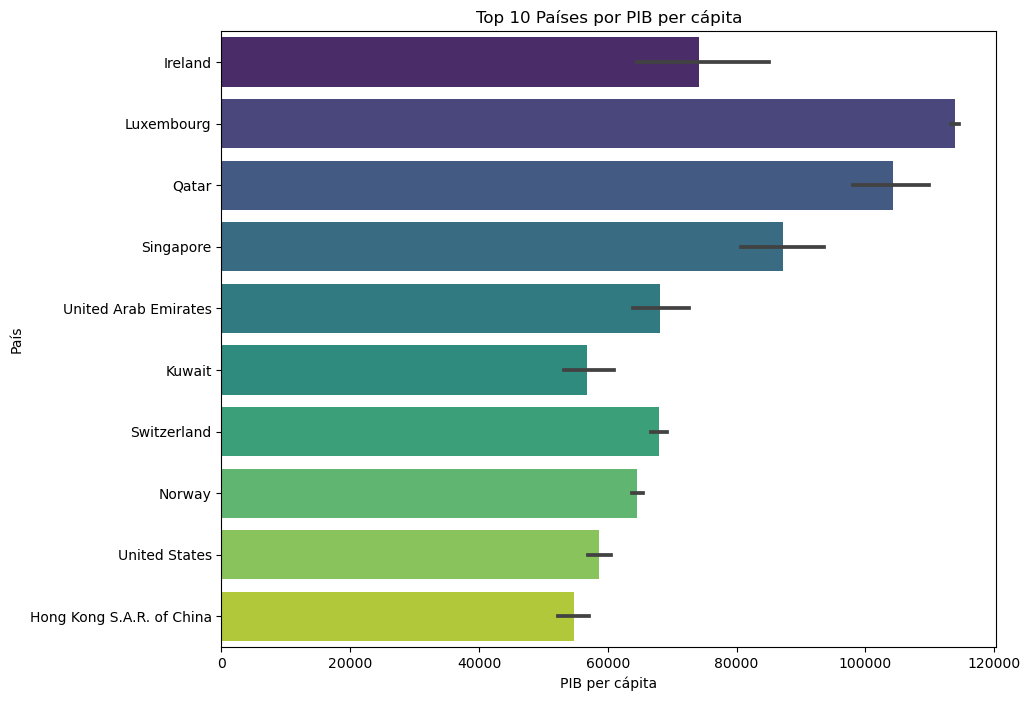

In [38]:

# Seleccionar los principales países según el PIB per cápita
top_countries = df_combined.groupby('Country name')['Rent per capita'].mean().nlargest(10).index

# Filtrar los datos para los países seleccionados
data_top_countries = df_combined[df_combined['Country name'].isin(top_countries)]

# Ordenar los datos por PIB per cápita de manera descendente
data_top_countries = data_top_countries.sort_values(by='Rent per capita', ascending=False)

# Crear la gráfica de barras horizontal
plt.figure(figsize=(10, 8))
sns.barplot(x='Rent per capita', y='Country name', data=data_top_countries, palette='viridis')
plt.title('Top 10 Países por PIB per cápita')
plt.xlabel('PIB per cápita')
plt.ylabel('País')
plt.show()


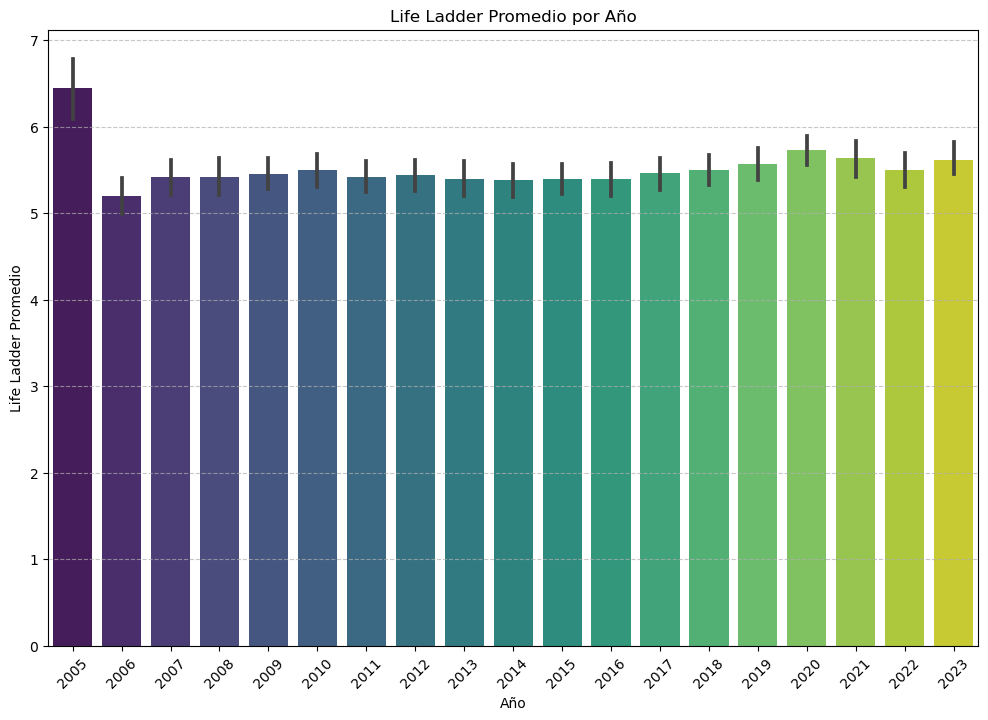

In [39]:
plt.figure(figsize=(12, 8))
sns.barplot(x='year', y='Life Ladder', data=df_combined, palette='viridis')
plt.title('Life Ladder Promedio por Año')
plt.xlabel('Año')
plt.ylabel('Life Ladder Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_3776\2576970394.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_combined['Positive affect'], shade=True, label='Positive affect')
C:\Users\hp\AppData\Local\Temp\ipykernel_3776\2576970394.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_combined['Negative affect'], shade=True, label='Negative affect')


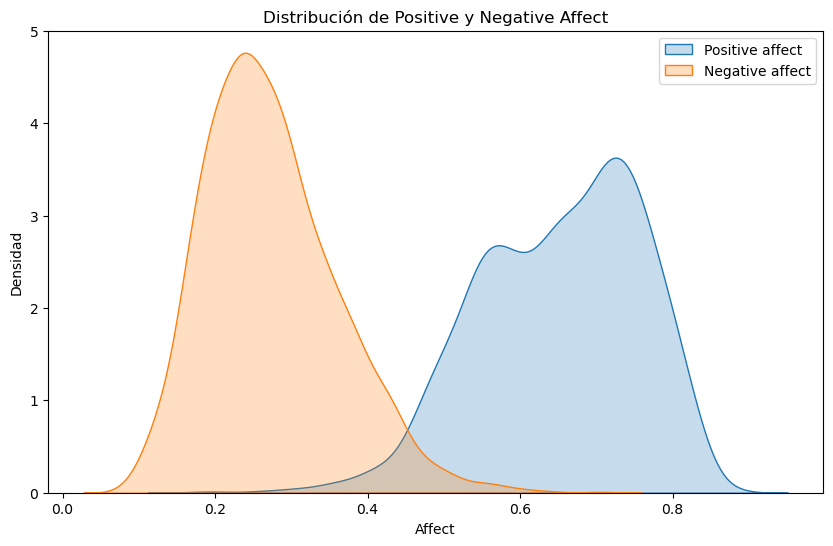

In [40]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_combined['Positive affect'], shade=True, label='Positive affect')
sns.kdeplot(data=df_combined['Negative affect'], shade=True, label='Negative affect')
plt.title('Distribución de Positive y Negative Affect')
plt.xlabel('Affect')
plt.ylabel('Densidad')
plt.legend()
plt.show()


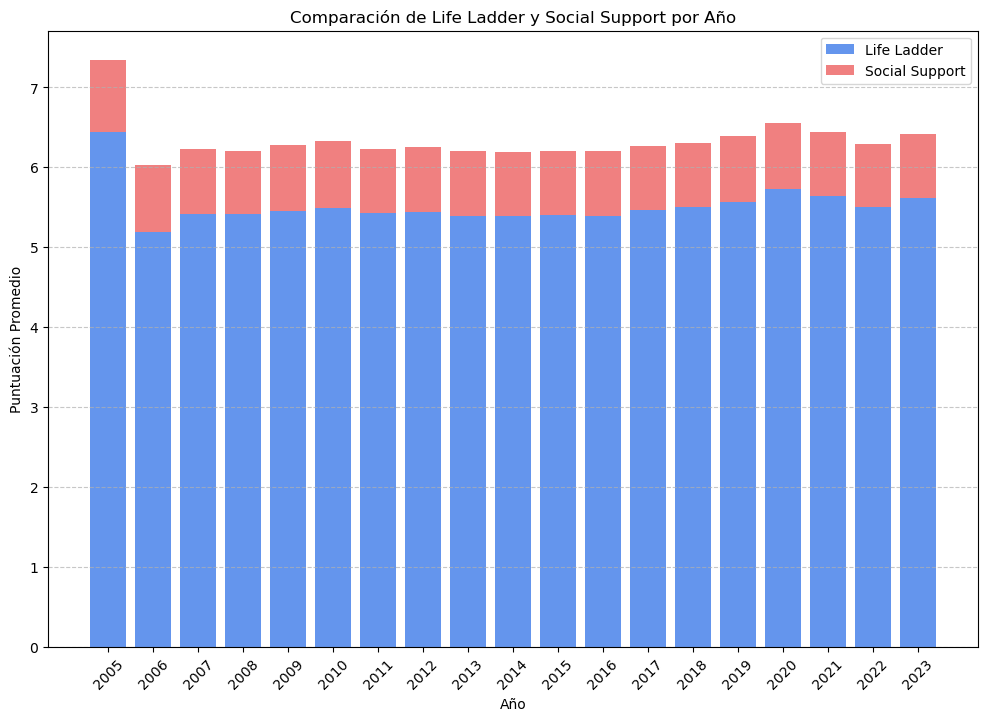

In [41]:
# Agrupar por año y calcular la media de Life Ladder y Social Support
df_yearly_means = df_combined.groupby('year')[['Life Ladder', 'Social support']].mean().reset_index()

# Definir colores para las barras
colors = ['cornflowerblue', 'lightcoral']

# Crear el gráfico de barras apiladas
plt.figure(figsize=(12, 8))
plt.bar(df_yearly_means['year'], df_yearly_means['Life Ladder'], color=colors[0], label='Life Ladder')
plt.bar(df_yearly_means['year'], df_yearly_means['Social support'], bottom=df_yearly_means['Life Ladder'], color=colors[1], label='Social Support')

# Personalizar el gráfico
plt.title('Comparación de Life Ladder y Social Support por Año')
plt.xlabel('Año')
plt.ylabel('Puntuación Promedio')
plt.xticks(df_yearly_means['year'], rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


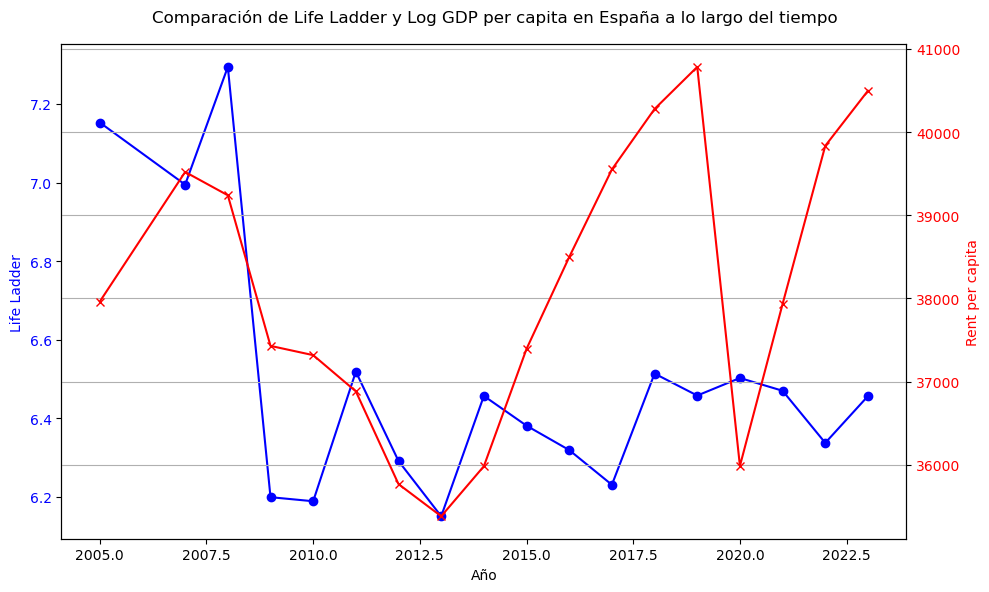

In [42]:
#COMPARATIVA DE ESPAÑA NIVEL DE RENTA PER CAPITA Y FELICIDAD

# Filtrar el dataframe para España
df_spain = df_combined[df_combined['Country name'] == 'Spain']

# Crear el gráfico de líneas temporales para Life Ladder y Log GDP per capita en España
fig, ax1 = plt.subplots(figsize=(10, 6))

# Línea de Life Ladder en el eje Y izquierdo
ax1.set_xlabel('Año')
ax1.set_ylabel('Life Ladder', color='b')
ax1.plot(df_spain['year'], df_spain['Life Ladder'], marker='o', color='b', label='Life Ladder (España)')
ax1.tick_params(axis='y', labelcolor='b')

# Crear un segundo eje Y que comparte el mismo eje X
ax2 = ax1.twinx()
ax2.set_ylabel('Rent per capita', color='r')
ax2.plot(df_spain['year'], df_spain['Rent per capita'], marker='x', color='r', label='Rent per capita (España)')
ax2.tick_params(axis='y', labelcolor='r')

# Título y leyendas
fig.suptitle('Comparación de Life Ladder y Log GDP per capita en España a lo largo del tiempo')
fig.tight_layout()  # Ajusta el layout para que no se solapen las etiquetas
plt.grid(True)
plt.show()



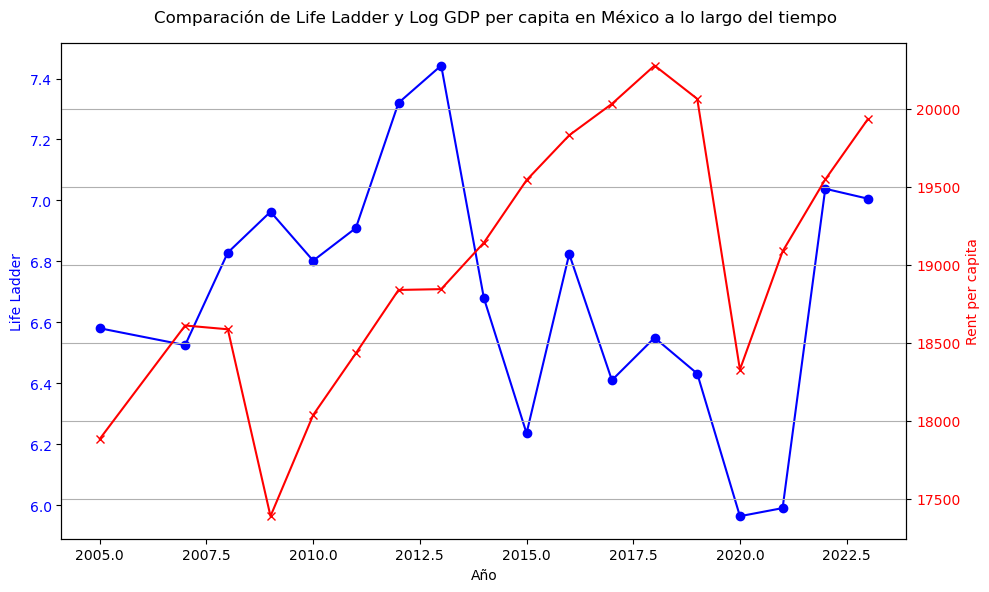

In [43]:
#Renta per capita y mexico


# Filtrar el dataframe para México
df_mexico = df_combined[df_combined['Country name'] == 'Mexico']

# Crear el gráfico de líneas temporales para Life Ladder y Log GDP per capita en México
fig, ax1 = plt.subplots(figsize=(10, 6))

# Línea de Life Ladder en el eje Y izquierdo
ax1.set_xlabel('Año')
ax1.set_ylabel('Life Ladder', color='b')
ax1.plot(df_mexico['year'], df_mexico['Life Ladder'], marker='o', color='b', label='Life Ladder (México)')
ax1.tick_params(axis='y', labelcolor='b')

# Crear un segundo eje Y que comparte el mismo eje X
ax2 = ax1.twinx()
ax2.set_ylabel('Rent per capita', color='r')
ax2.plot(df_mexico['year'], df_mexico['Rent per capita'], marker='x', color='r', label='Rent per capita (México)')
ax2.tick_params(axis='y', labelcolor='r')

# Título y leyendas
fig.suptitle('Comparación de Life Ladder y Log GDP per capita en México a lo largo del tiempo')
fig.tight_layout()  # Ajusta el layout para que no se solapen las etiquetas
plt.grid(True)
plt.show()


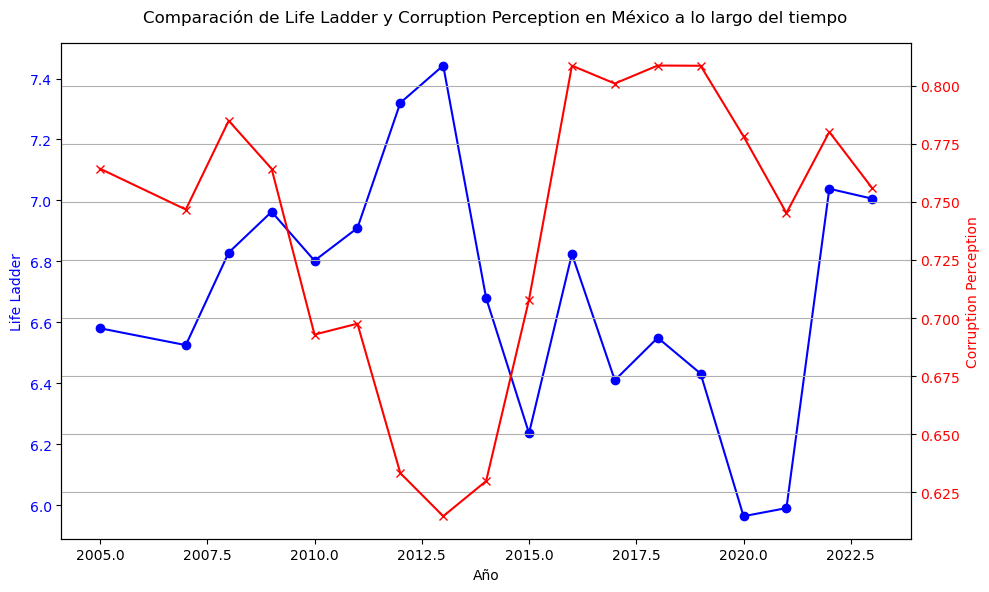

In [44]:
import matplotlib.pyplot as plt

# Filtrar el dataframe para México
df_mexico = df_combined[df_combined['Country name'] == 'Mexico']

# Crear el gráfico de líneas temporales para Life Ladder y Corruption Perception en México
fig, ax1 = plt.subplots(figsize=(10, 6))

# Línea de Life Ladder en el eje Y izquierdo
ax1.set_xlabel('Año')
ax1.set_ylabel('Life Ladder', color='b')
ax1.plot(df_mexico['year'], df_mexico['Life Ladder'], marker='o', color='b', label='Life Ladder (México)')
ax1.tick_params(axis='y', labelcolor='b')

# Crear un segundo eje Y que comparte el mismo eje X
ax2 = ax1.twinx()
ax2.set_ylabel('Corruption Perception', color='r')
ax2.plot(df_mexico['year'], df_mexico['Corruption Perception'], marker='x', color='r', label='Corruption Perception (México)')
ax2.tick_params(axis='y', labelcolor='r')

# Título y leyendas
fig.suptitle('Comparación de Life Ladder y Corruption Perception en México a lo largo del tiempo')
fig.tight_layout()  # Ajusta el layout para que no se solapen las etiquetas
plt.grid(True)
plt.show()


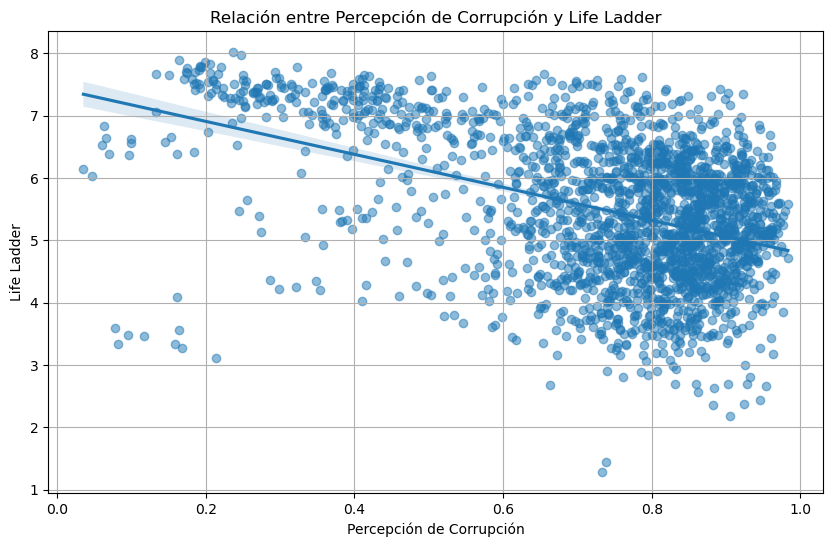

In [45]:
# Gráfico de dispersión con línea de tendencia
plt.figure(figsize=(10, 6))
sns.regplot(x='Corruption Perception', y='Life Ladder', data=df_combined, scatter_kws={'alpha':0.5})
plt.title('Relación entre Percepción de Corrupción y Life Ladder')
plt.xlabel('Percepción de Corrupción')
plt.ylabel('Life Ladder')
plt.grid(True)
plt.show()


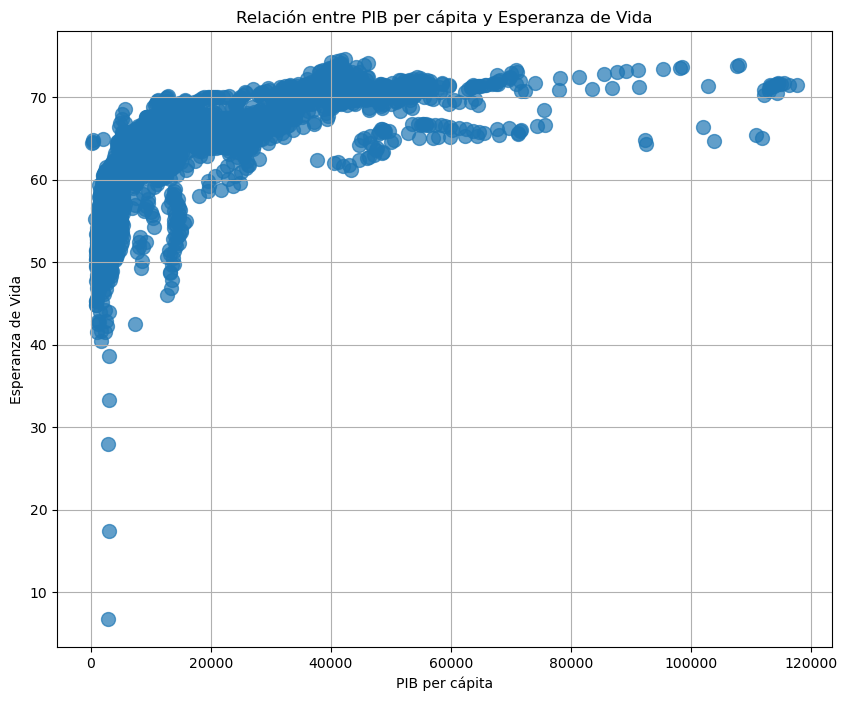

In [46]:
plt.figure(figsize=(10, 8))
plt.scatter(df_combined['Rent per capita'], df_combined['Healthy Life Expectancy'], s=100, alpha=0.7)
plt.title('Relación entre PIB per cápita y Esperanza de Vida')
plt.xlabel('PIB per cápita')
plt.ylabel('Esperanza de Vida')
plt.grid(True)
plt.show()



In [47]:
# Guardar el DataFrame en CSV con punto y coma como delimitador
output_file_path = r"C:\Users\hp\Documents\Proyecto Final\Datos de la felicidad_modificado.csv"
df_combined.to_csv(output_file_path, index=False, sep=';', float_format='%.6f', encoding='ISO-8859-1')

# Reemplazar puntos por comas en el archivo final
with open(output_file_path, 'r', encoding='ISO-8859-1') as file:
    filedata = file.read()

filedata = filedata.replace('.', ',')

with open(output_file_path, 'w', encoding='ISO-8859-1') as file:
    file.write(filedata)

print(f'Archivo modificado guardado en: {output_file_path}')

# Leer el archivo CSV modificado con el delimitador de punto y coma y la codificación adecuada
df_3 = pd.read_csv(output_file_path, sep=';', encoding='ISO-8859-1')

Archivo modificado guardado en: C:\Users\hp\Documents\Proyecto Final\Datos de la felicidad_modificado.csv


In [48]:
df_3

,Country name,year,Life Ladder,Social support,Healthy Life Expectancy,Freedom,Generosity Score,Corruption Perception,Positive affect,Negative affect,Ladder Score,Upper Whisker,Lower Whisker,Transparecy,Rent per capita,Continent,High Corruption,Low Corruption
0,Afghanistan,2008,"3,723590","0,450662","50,500000","0,718114","0,164055","0,881686","0,414297","0,258195","1,721000","1,775271","1,666728",4,"1556,844326",Asia,1,0
1,Afghanistan,2009,"4,401778","0,552308","50,799999","0,678896","0,187297","0,850035","0,481421","0,237092","1,721000","1,775271","1,666728",4,"1823,742544",Asia,1,0
2,Afghanistan,2010,"4,758381","0,539075","51,099998","0,600127","0,117861","0,706766","0,516907","0,275324","1,721000","1,775271","1,666728",4,"2026,164159",Asia,1,0
3,Afghanistan,2011,"3,831719","0,521104","51,400002","0,495901","0,160098","0,731109","0,479835","0,267175","1,721000","1,775271","1,666728",4,"1961,095989",Asia,1,0
4,Afghanistan,2012,"3,782938","0,520637","51,700001","0,530935","0,234157","0,775620","0,613513","0,267919","1,721000","1,775271","1,666728",4,"2122,830825",Asia,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,"2,693523","0,759162","53,099998","0,631908","-0,050874","0,830652","0,658434","0,235354","3,341100","3,456574","3,225626",0,"2203,396554",Africa,1,0
2359,Zimbabwe,2020,"3,159802","0,717243","53,575001","0,643303","0,002848","0,788523","0,660658","0,345736","3,341100","3,456574","3,225626",0,"1990,319112",Africa,1,0
2360,Zimbabwe,2021,"3,154578","0,685151","54,049999","0,667636","-0,079007","0,756945","0,609917","0,241682","3,341100","3,456574","3,225626",0,"2115,144628",Africa,1,0
2361,Zimbabwe,2022,"3,296220","0,666172","54,525002","0,651987","-0,072935","0,752632","0,640609","0,191350","3,341100","3,456574","3,225626",0,"2143,237965",Africa,1,0


In [49]:
# Guardar el DataFrame combinado en un nuevo archivo CSV

output_combined_file_path = r"C:\Users\hp\Documents\Proyecto Final\Datos_de_la_felicidad_combined.csv"
df_3.to_csv(output_combined_file_path, index=False, sep=';', float_format='%.6f', encoding='ISO-8859-1')

print(f'Archivo combinado guardado en: {output_combined_file_path}')

Archivo combinado guardado en: C:\Users\hp\Documents\Proyecto Final\Datos_de_la_felicidad_combined.csv


In [50]:

# Leer el archivo Excel
file_path = r"C:\Users\hp\Documents\Proyecto Final\API_SI.POV.GINI_DS2_es_excel_v2_289679.xls"
gini_df = pd.read_excel(file_path, sheet_name='Data')

gini_df

,Data Source,Indicadores del desarrollo mundial,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,Last Updated Date,2024-06-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
3,Aruba,ABW,Índice de Gini,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,AFE,Índice de Gini,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Kosovo,XKX,Índice de Gini,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,27.3,26.5,26.7,29.0,NaN,NaN,NaN,NaN,NaN,NaN
265,"Yemen, Rep. del",YEM,Índice de Gini,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,Sudáfrica,ZAF,Índice de Gini,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,Zambia,ZMB,Índice de Gini,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,55.9,NaN,NaN,NaN,NaN,NaN,NaN,51.5,NaN


In [51]:
import pandas as pd

# Leer el archivo Excel
file_path = r"C:\Users\hp\Documents\Proyecto Final\API_SI.POV.GINI_DS2_es_excel_v2_289679.xls"
gini_df = pd.read_excel(file_path, sheet_name='Data')


# Identificar la fila que contiene los nombres de las columnas correctas
# Supongamos que es la fila 2 (puedes ajustarlo según sea necesario)
gini_df = pd.read_excel(file_path, sheet_name='Data', header=2)

# Mostrar los nombres de las columnas después de ajustar la fila de encabezado
print(gini_df.columns)

# Ajustar los nombres de las columnas para que coincidan con los nombres esperados
gini_df.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + [str(year) for year in range(1960, 2024)]

# Identificar las columnas que necesitas mantener
columns_to_keep = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + [str(year) for year in range(2000, 2024)]

# Filtrar las columnas necesarias
gini_df = gini_df[columns_to_keep]

# Renombrar columnas para mayor claridad
gini_df.rename(columns={'Country Name': 'Country name'}, inplace=True)

# Filtrar solo los datos del índice de Gini
gini_df = gini_df[gini_df['Indicator Name'] == 'Índice de Gini']

# Eliminar columnas innecesarias
gini_df.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'], inplace=True)

# Transformar el DataFrame de formato ancho a largo
gini_df = gini_df.melt(id_vars=['Country name'], var_name='Year', value_name='Gini Index')

# Convertir la columna de años a enteros
gini_df['Year'] = gini_df['Year'].astype(int)

# Eliminar filas con valores nulos
gini_df.dropna(subset=['Gini Index'], inplace=True)

# Ver las primeras filas del DataFrame limpio
print(gini_df.head())



Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58', 'Unnamed: 59', 'Unna

In [52]:
gini_df

,Country name,Year,Gini Index
4,Angola,2000,52.0
9,Argentina,2000,51.1
14,Austria,2000,29.0
17,Bélgica,2000,33.1
20,Bangladesh,2000,33.4
...,...,...,...
6104,Uzbekistán,2022,31.2
6109,Viet Nam,2022,36.1
6116,Zambia,2022,51.5
6224,Indonesia,2023,38.3


In [53]:
gini_df['Gini Index'] = gini_df['Gini Index'].astype(str).str.replace('.', ',')

In [54]:
gini_df

,Country name,Year,Gini Index
4,Angola,2000,"52,0"
9,Argentina,2000,"51,1"
14,Austria,2000,"29,0"
17,Bélgica,2000,"33,1"
20,Bangladesh,2000,"33,4"
...,...,...,...
6104,Uzbekistán,2022,"31,2"
6109,Viet Nam,2022,"36,1"
6116,Zambia,2022,"51,5"
6224,Indonesia,2023,"38,3"


In [55]:
import pandas as pd

# Renombrar la columna 'year' en df_3 a 'Year' para que coincida con gini_df
df_3.rename(columns={'year': 'Year'}, inplace=True)

# Realizar el merge
df_final = pd.merge(df_3, gini_df, on=['Country name', 'Year'], how='left')

def replace_dot_with_comma(x):
    if isinstance(x, str):
        return x.replace('.', ',')
    return x

# Aplicar la función a la columna 'Gini Index'
df_final['Gini Index'] = df_final['Gini Index'].apply(replace_dot_with_comma)


In [56]:
df_final

,Country name,Year,Life Ladder,Social support,Healthy Life Expectancy,Freedom,Generosity Score,Corruption Perception,Positive affect,Negative affect,Ladder Score,Upper Whisker,Lower Whisker,Transparecy,Rent per capita,Continent,High Corruption,Low Corruption,Gini Index
0,Afghanistan,2008,"3,723590","0,450662","50,500000","0,718114","0,164055","0,881686","0,414297","0,258195","1,721000","1,775271","1,666728",4,"1556,844326",Asia,1,0,NaN
1,Afghanistan,2009,"4,401778","0,552308","50,799999","0,678896","0,187297","0,850035","0,481421","0,237092","1,721000","1,775271","1,666728",4,"1823,742544",Asia,1,0,NaN
2,Afghanistan,2010,"4,758381","0,539075","51,099998","0,600127","0,117861","0,706766","0,516907","0,275324","1,721000","1,775271","1,666728",4,"2026,164159",Asia,1,0,NaN
3,Afghanistan,2011,"3,831719","0,521104","51,400002","0,495901","0,160098","0,731109","0,479835","0,267175","1,721000","1,775271","1,666728",4,"1961,095989",Asia,1,0,NaN
4,Afghanistan,2012,"3,782938","0,520637","51,700001","0,530935","0,234157","0,775620","0,613513","0,267919","1,721000","1,775271","1,666728",4,"2122,830825",Asia,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,"2,693523","0,759162","53,099998","0,631908","-0,050874","0,830652","0,658434","0,235354","3,341100","3,456574","3,225626",0,"2203,396554",Africa,1,0,"50,3"
2359,Zimbabwe,2020,"3,159802","0,717243","53,575001","0,643303","0,002848","0,788523","0,660658","0,345736","3,341100","3,456574","3,225626",0,"1990,319112",Africa,1,0,NaN
2360,Zimbabwe,2021,"3,154578","0,685151","54,049999","0,667636","-0,079007","0,756945","0,609917","0,241682","3,341100","3,456574","3,225626",0,"2115,144628",Africa,1,0,NaN
2361,Zimbabwe,2022,"3,296220","0,666172","54,525002","0,651987","-0,072935","0,752632","0,640609","0,191350","3,341100","3,456574","3,225626",0,"2143,237965",Africa,1,0,NaN


In [58]:
#El índice de Gini es una medida de la desigualdad de ingresos dentro de un país. Se representa en una escala de 0 a 100, donde 0 indica igualdad perfecta (todos tienen el mismo ingreso) y 100 indica desigualdad máxima (una persona tiene todo el ingreso y los demás no tienen nada).

In [59]:
#pip install requests beautifulsoup4 pandas

In [60]:
# Guardar el DataFrame combinado en un nuevo archivo CSV

output_combined_file_path = r"C:\Users\hp\Documents\Proyecto Final\Datos_de_la_felicidad_final.csv"
df_final.to_csv(output_combined_file_path, index=False, sep=';', float_format='%.6f', encoding='ISO-8859-1')

print(f'Archivo combinado guardado en: {output_combined_file_path}')

Archivo combinado guardado en: C:\Users\hp\Documents\Proyecto Final\Datos_de_la_felicidad_final.csv


In [61]:
#     CREAR API

In [62]:
#!pip install sqlalchemy


In [63]:
import pandas as pd
from sqlalchemy import create_engine, Column, Integer, String, Float
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker

# Supongamos que ya tienes el DataFrame `df_final` listo
# df_final = pd.read_csv('path_to_your_cleaned_data.csv')

# Reemplazar comas por puntos en las columnas numéricas
numerical_columns = [
    'Life Ladder', 'Social support', 'Healthy Life Expectancy', 'Freedom',
    'Generosity Score', 'Corruption Perception', 'Positive affect',
    'Negative affect', 'Ladder Score', 'Upper Whisker', 'Lower Whisker',
    'Rent per capita', 'High Corruption', 'Low Corruption', 'Gini Index'
]

for column in numerical_columns:
    # Convertir la columna a cadena, luego reemplazar comas por puntos y convertir a float
    df_final[column] = df_final[column].astype(str).str.replace(',', '.').astype(float)


# Definir la base de datos y la tabla
Base = declarative_base()

class CountryHappiness(Base):
    __tablename__ = 'country_happiness'
    id = Column(Integer, primary_key=True)
    country = Column(String, nullable=False)
    year = Column(Integer)
    life_ladder = Column(Float)
    social_support = Column(Float)
    healthy_life_expectancy = Column(Float)
    freedom = Column(Float)
    generosity_score = Column(Float)
    corruption_perception = Column(Float)
    positive_affect = Column(Float)
    negative_affect = Column(Float)
    ladder_score = Column(Float)
    upper_whisker = Column(Float)
    lower_whisker = Column(Float)
    transparency = Column(Float)
    rent_per_capita = Column(Float)
    continent = Column(String)
    high_corruption = Column(Float)
    low_corruption = Column(Float)
    gini_index = Column(Float)

# Crear la base de datos
engine = create_engine('sqlite:///world_happiness_new.db')
Base.metadata.create_all(engine)

# Crear una sesión
Session = sessionmaker(bind=engine)
session = Session()

# Añadir los datos del DataFrame a la base de datos
for index, row in df_final.iterrows():
    country_data = CountryHappiness(
        country=row['Country name'],
        year=row['Year'],
        life_ladder=row['Life Ladder'],
        social_support=row['Social support'],
        healthy_life_expectancy=row['Healthy Life Expectancy'],
        freedom=row['Freedom'],
        generosity_score=row['Generosity Score'],
        corruption_perception=row['Corruption Perception'],
        positive_affect=row['Positive affect'],
        negative_affect=row['Negative affect'],
        ladder_score=row['Ladder Score'],
        upper_whisker=row['Upper Whisker'],
        lower_whisker=row['Lower Whisker'],
        transparency=row['Transparecy'],
        rent_per_capita=row['Rent per capita'],
        continent=row['Continent'],
        high_corruption=row['High Corruption'],
        low_corruption=row['Low Corruption'],
        gini_index=row['Gini Index']
    )
    session.add(country_data)

session.commit()
session.close()




C:\Users\hp\AppData\Local\Temp\ipykernel_3776\1095813069.py:23: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


In [64]:
import sqlite3
import os

# Ruta completa de la base de datos
db_path = r'C:\Users\hp\OneDrive\Escritorio\my_flask_app\data\world_happiness_new.db'

# Conectar a la base de datos
try:
    conn = sqlite3.connect(db_path)
    c = conn.cursor()

    # Listar las tablas
    c.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = c.fetchall()
    print("Tablas en la base de datos:", tables)

    # Verificar los datos en la tabla country_happiness
    c.execute("SELECT * FROM country_happiness LIMIT 5;")
    rows = c.fetchall()
    for row in rows:
        print(row)

    conn.close()
except sqlite3.OperationalError as e:
    print(f"Error: {e}")



Tablas en la base de datos: [('country_happiness',)]
(1, 'Afghanistan', 2008, 3.72359, 0.450662, 50.5, 0.718114, 0.164055, 0.881686, 0.414297, 0.258195, 1.721, 1.775271, 1.666728, 4.0, 1556.844326, 'Asia', 1.0, 0.0, None)
(2, 'Afghanistan', 2009, 4.401778, 0.552308, 50.799999, 0.678896, 0.187297, 0.850035, 0.481421, 0.237092, 1.721, 1.775271, 1.666728, 4.0, 1823.742544, 'Asia', 1.0, 0.0, None)
(3, 'Afghanistan', 2010, 4.758381, 0.539075, 51.099998, 0.600127, 0.117861, 0.706766, 0.516907, 0.275324, 1.721, 1.775271, 1.666728, 4.0, 2026.164159, 'Asia', 1.0, 0.0, None)
(4, 'Afghanistan', 2011, 3.831719, 0.521104, 51.400002, 0.495901, 0.160098, 0.731109, 0.479835, 0.267175, 1.721, 1.775271, 1.666728, 4.0, 1961.095989, 'Asia', 1.0, 0.0, None)
(5, 'Afghanistan', 2012, 3.782938, 0.520637, 51.700001, 0.530935, 0.234157, 0.77562, 0.613513, 0.267919, 1.721, 1.775271, 1.666728, 4.0, 2122.830825, 'Asia', 1.0, 0.0, None)


In [65]:
from flask import Flask, render_template, request, redirect, url_for, jsonify
from flask_sqlalchemy import SQLAlchemy
import os
import json

# Crear la aplicación Flask y configurar la base de datos
app = Flask(__name__)

# Obtener la ruta absoluta de la base de datos
basedir = os.path.abspath(os.path.dirname(__file__))
db_path = os.path.join(basedir, 'data', 'world_happiness_new.db')

# Configurar la base de datos SQLite
app.config['SQLALCHEMY_DATABASE_URI'] = f'sqlite:///{db_path}'
app.config['SQLALCHEMY_TRACK_MODIFICATIONS'] = False
db = SQLAlchemy(app)

# Definir el modelo de la base de datos
class CountryHappiness(db.Model):
    __tablename__ = 'country_happiness'
    id = db.Column(db.Integer, primary_key=True)
    country = db.Column(db.String, nullable=False)
    year = db.Column(db.Integer)


NameError: name '__file__' is not defined

In [ ]:
#pip install flask_sqlalchemy


In [ ]:
#pip install sqlalchemy

In [66]:
import json

@app.route('/api/happiness', methods=['GET'])
def get_happiness():
    results = session.query(CountryHappiness).all()
    data = [
        {
            'country': row.country,
            'year': row.year,
            'life_ladder': row.life_ladder,
            'social_support': row.social_support,
            'healthy_life_expectancy': row.healthy_life_expectancy,
            'freedom': row.freedom,
            'generosity_score': row.generosity_score,
            'corruption_perception': row.corruption_perception,
            'positive_affect': row.positive_affect,
            'negative_affect': row.negative_affect,
            'ladder_score': row.ladder_score,
            'upper_whisker': row.upper_whisker,
            'lower_whisker': row.lower_whisker,
            'transparency': row.transparency,
            'rent_per_capita': row.rent_per_capita,
            'continent': row.continent,
            'high_corruption': row.high_corruption,
            'low_corruption': row.low_corruption,
            'gini_index': row.gini_index
        } for row in results
    ]
    return jsonify(json.loads(json.dumps(data, indent=4)))


In [67]:
#añadir más rutas para funcionalidades adicionales como buscar datos por país o por año.

@app.route('/api/happiness/<country>', methods=['GET'])
def get_happiness_by_country(country):
    results = session.query(CountryHappiness).filter_by(country=country).all()
    data = [
        {
            'country': row.country,
            'year': row.year,
            'life_ladder': row.life_ladder,
            'social_support': row.social_support,
            'healthy_life_expectancy': row.healthy_life_expectancy,
            'freedom': row.freedom,
            'generosity_score': row.generosity_score,
            'corruption_perception': row.corruption_perception,
            'positive_affect': row.positive_affect,
            'negative_affect': row.negative_affect,
            'ladder_score': row.ladder_score,
            'upper_whisker': row.upper_whisker,
            'lower_whisker': row.lower_whisker,
            'transparency': row.transparency,
            'rent_per_capita': row.rent_per_capita,
            'continent': row.continent,
            'high_corruption': row.high_corruption,
            'low_corruption': row.low_corruption,
            'gini_index': row.gini_index
        } for row in results
    ]
    return jsonify(json.loads(json.dumps(data, indent=4)))


In [68]:
@app.errorhandler(404)
def not_found(error):
    return jsonify({"error": "Not found"}), 404

@app.errorhandler(500)
def internal_error(error):
    return jsonify({"error": "Internal server error"}), 500


In [ ]:
#Por si acaso,agregar LATITUD Y LONGITUD (De momento mucho lio)

In [85]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la página web que contiene los datos
url = "https://developers.google.com/public-data/docs/canonical/countries_csv?hl=es-419"

# Hacer una solicitud GET a la página web
response = requests.get(url)

# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    # Analizar el contenido HTML de la página web
    soup = BeautifulSoup(response.content, 'html.parser')

    # Encontrar la tabla que contiene los datos
    table = soup.find('table')  # Suponiendo que los datos están dentro de una tabla

    if table:
        # Extraer las filas de la tabla
        rows = table.find_all('tr')

        # Procesar las filas y columnas para crear una lista de listas
        data = []
        for row in rows:
            cols = row.find_all(['td', 'th'])  # Incluir tanto 'td' como 'th'
            cols = [col.text.strip() for col in cols]
            data.append(cols)

        if len(data) > 0:
            # Crear un DataFrame a partir de los datos extraídos
            geo_data = pd.DataFrame(data[1:], columns=data[0])  # Excluir la primera fila si contiene encabezados

            # Guardar el DataFrame en un archivo CSV
            geo_data.to_csv('countries.csv', index=False)
            print("Datos extraídos y guardados en 'countries.csv' con éxito.")
        else:
            print("No se encontraron datos en la tabla.")
    else:
        print("No se encontró ninguna tabla en la página.")
else:
    print(f"Error al descargar la página: {response.status_code}")

# Cargar los datos de geografía desde el archivo CSV
geo_data = pd.read_csv('countries.csv')

# Asegurarse de que la columna 'Country name' esté renombrada como 'name' en df_final
df_final = df_final.rename(columns={'Country name': 'name'})

# Unir los datos de felicidad con los datos geográficos
df_merged = pd.merge(df_final, geo_data, on='name', how='left')

# Eliminar la columna 'country'
df_merged.drop(columns=['country'], inplace=True)

# Reemplazar los puntos decimales por comas en todas las columnas numéricas
df_merged = df_merged.applymap(lambda x: str(x).replace('.', ',') if isinstance(x, (int, float)) else x)

# Verificar los datos unidos
print(df_merged.head())

# Guardar el DataFrame resultante en un archivo CSV con la codificación adecuada y separador de punto y coma
output_combined_file_path = r"C:\Users\hp\Documents\Proyecto Final\Datos_de_la_felicidad_merged.csv"
df_merged.to_csv(output_combined_file_path, index=False, sep=';', float_format='%.6f', encoding='utf-8-sig')

print(f'Archivo combinado guardado en: {output_combined_file_path}')


Datos extraídos y guardados en 'countries.csv' con éxito.
          name  Year Life Ladder Social support Healthy Life Expectancy  \
0  Afghanistan  2008     3,72359       0,450662                    50,5   
1  Afghanistan  2009    4,401778       0,552308               50,799999   
2  Afghanistan  2010    4,758381       0,539075               51,099998   
3  Afghanistan  2011    3,831719       0,521104               51,400002   
4  Afghanistan  2012    3,782938       0,520637               51,700001   

    Freedom Generosity Score Corruption Perception Positive affect  \
0  0,718114         0,164055              0,881686        0,414297   
1  0,678896         0,187297              0,850035        0,481421   
2  0,600127         0,117861              0,706766        0,516907   
3  0,495901         0,160098              0,731109        0,479835   
4  0,530935         0,234157               0,77562        0,613513   

  Negative affect  ... Upper Whisker Lower Whisker Transparecy  \
0   

In [88]:
import pandas as pd

# Cargar el DataFrame desde el archivo CSV
file_path = r"C:\Users\hp\Documents\Proyecto Final\Datos_de_la_felicidad_merged.csv"
df = pd.read_csv(file_path, sep=';', encoding='utf-8-sig')

# Filtrar los datos de Hong Kong
hong_kong_data = df[df['name'].str.contains('Hong Kong', case=False, na=False)]

# Mostrar los datos de Hong Kong
print(hong_kong_data)


                          name  Year Life Ladder Social support  \
846  Hong Kong S,A,R, of China  2006    5,511187       0,812178   
847  Hong Kong S,A,R, of China  2008    5,137262       0,840222   
848  Hong Kong S,A,R, of China  2009    5,397056       0,834716   
849  Hong Kong S,A,R, of China  2010    5,642835       0,857314   
850  Hong Kong S,A,R, of China  2011    5,474011        0,84606   
851  Hong Kong S,A,R, of China  2012    5,483765       0,826426   
852  Hong Kong S,A,R, of China  2014    5,458051       0,833558   
853  Hong Kong S,A,R, of China  2016    5,498421       0,832078   
854  Hong Kong S,A,R, of China  2017    5,362475       0,831066   
855  Hong Kong S,A,R, of China  2019    5,659317       0,855826   
856  Hong Kong S,A,R, of China  2020    5,295341       0,812943   
857  Hong Kong S,A,R, of China  2021    5,321551       0,821089   
858  Hong Kong S,A,R, of China  2022    5,311294       0,803008   

    Healthy Life Expectancy   Freedom Generosity Score Corrup

In [86]:
df_merged

,name,Year,Life Ladder,Social support,Healthy Life Expectancy,Freedom,Generosity Score,Corruption Perception,Positive affect,Negative affect,...,Upper Whisker,Lower Whisker,Transparecy,Rent per capita,Continent,High Corruption,Low Corruption,Gini Index,latitude,longitude
0,Afghanistan,2008,"3,72359","0,450662","50,5","0,718114","0,164055","0,881686","0,414297","0,258195",...,"1,775271","1,666728",4,"1556,844326",Asia,"1,0","0,0",nan,nan,nan
1,Afghanistan,2009,"4,401778","0,552308","50,799999","0,678896","0,187297","0,850035","0,481421","0,237092",...,"1,775271","1,666728",4,"1823,742544",Asia,"1,0","0,0",nan,nan,nan
2,Afghanistan,2010,"4,758381","0,539075","51,099998","0,600127","0,117861","0,706766","0,516907","0,275324",...,"1,775271","1,666728",4,"2026,164159",Asia,"1,0","0,0",nan,nan,nan
3,Afghanistan,2011,"3,831719","0,521104","51,400002","0,495901","0,160098","0,731109","0,479835","0,267175",...,"1,775271","1,666728",4,"1961,095989",Asia,"1,0","0,0",nan,nan,nan
4,Afghanistan,2012,"3,782938","0,520637","51,700001","0,530935","0,234157","0,77562","0,613513","0,267919",...,"1,775271","1,666728",4,"2122,830825",Asia,"1,0","0,0",nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,"2,693523","0,759162","53,099998","0,631908","-0,050874","0,830652","0,658434","0,235354",...,"3,456574","3,225626",0,"2203,396554",Africa,"1,0","0,0","50,3",nan,nan
2359,Zimbabwe,2020,"3,159802","0,717243","53,575001","0,643303","0,002848","0,788523","0,660658","0,345736",...,"3,456574","3,225626",0,"1990,319112",Africa,"1,0","0,0",nan,nan,nan
2360,Zimbabwe,2021,"3,154578","0,685151","54,049999","0,667636","-0,079007","0,756945","0,609917","0,241682",...,"3,456574","3,225626",0,"2115,144628",Africa,"1,0","0,0",nan,nan,nan
2361,Zimbabwe,2022,"3,29622","0,666172","54,525002","0,651987","-0,072935","0,752632","0,640609","0,19135",...,"3,456574","3,225626",0,"2143,237965",Africa,"1,0","0,0",nan,nan,nan


In [91]:
import pandas as pd

# Cargar el DataFrame desde el archivo CSV original
file_path = r"C:\Users\hp\Documents\Proyecto Final\Datos_de_la_felicidad_merged.csv"
df = pd.read_csv(file_path, sep=';', encoding='utf-8-sig')

# Reemplazar puntos por comas en todas las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].applymap(lambda x: str(x).replace('.', ','))

# Guardar el DataFrame resultante en un archivo CSV con la codificación adecuada y separador de punto y coma
output_combined_file_path = r"C:\Users\hp\Documents\Proyecto Final\Datos_de_la_felicidad_merged_commas.csv"
df.to_csv(output_combined_file_path, index=False, sep=';', encoding='utf-8-sig')

print(f'Archivo combinado guardado en: {output_combined_file_path}')


Archivo combinado guardado en: C:\Users\hp\Documents\Proyecto Final\Datos_de_la_felicidad_merged_commas.csv


In [92]:
df_merged

,name,Year,Life Ladder,Social support,Healthy Life Expectancy,Freedom,Generosity Score,Corruption Perception,Positive affect,Negative affect,...,Upper Whisker,Lower Whisker,Transparecy,Rent per capita,Continent,High Corruption,Low Corruption,Gini Index,latitude,longitude
0,Afghanistan,2008,"3,72359","0,450662","50,5","0,718114","0,164055","0,881686","0,414297","0,258195",...,"1,775271","1,666728",4,"1556,844326",Asia,"1,0","0,0",nan,nan,nan
1,Afghanistan,2009,"4,401778","0,552308","50,799999","0,678896","0,187297","0,850035","0,481421","0,237092",...,"1,775271","1,666728",4,"1823,742544",Asia,"1,0","0,0",nan,nan,nan
2,Afghanistan,2010,"4,758381","0,539075","51,099998","0,600127","0,117861","0,706766","0,516907","0,275324",...,"1,775271","1,666728",4,"2026,164159",Asia,"1,0","0,0",nan,nan,nan
3,Afghanistan,2011,"3,831719","0,521104","51,400002","0,495901","0,160098","0,731109","0,479835","0,267175",...,"1,775271","1,666728",4,"1961,095989",Asia,"1,0","0,0",nan,nan,nan
4,Afghanistan,2012,"3,782938","0,520637","51,700001","0,530935","0,234157","0,77562","0,613513","0,267919",...,"1,775271","1,666728",4,"2122,830825",Asia,"1,0","0,0",nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,"2,693523","0,759162","53,099998","0,631908","-0,050874","0,830652","0,658434","0,235354",...,"3,456574","3,225626",0,"2203,396554",Africa,"1,0","0,0","50,3",nan,nan
2359,Zimbabwe,2020,"3,159802","0,717243","53,575001","0,643303","0,002848","0,788523","0,660658","0,345736",...,"3,456574","3,225626",0,"1990,319112",Africa,"1,0","0,0",nan,nan,nan
2360,Zimbabwe,2021,"3,154578","0,685151","54,049999","0,667636","-0,079007","0,756945","0,609917","0,241682",...,"3,456574","3,225626",0,"2115,144628",Africa,"1,0","0,0",nan,nan,nan
2361,Zimbabwe,2022,"3,29622","0,666172","54,525002","0,651987","-0,072935","0,752632","0,640609","0,19135",...,"3,456574","3,225626",0,"2143,237965",Africa,"1,0","0,0",nan,nan,nan
